# Introduction to Pandas

---

### Pandas background
- Name is based on "Panel Data", an econometrics term.
- Invented by researchers at AQR hedge fund around 2008
- Fast, powerful, flexible library for working with datasets
    - Especially good for time series (= panel data)
    
### Useful terms
- Main object is a **dataframe** (think spreadsheet in excel)
- A ***series*** is a single column of data 
- The row labels are called the **index** 

# CPS Data

---

#### Data Overview
- Current Population Survey is the official source of many US government statistics
- Every month the Labor Department + Census team up to survey the country 
    - Ask questions about work and employment
    - Basic demographics like age, race, sex
- We will use the March Annual Social and Economic Supplement which asks detailed questions 
    - Income
    - Hours worked
- Data is downloaded from IPUMS.
- Variable descriptions are available here: https://cps.ipums.org/
    
#### Other details
I have pre-cleaned the data. This is just to make things simpler to learn in class. 

- Moved to David Dorn's harmonized occupation codes.
- Sample selection following Heathcote Perri Violante 2010 
- I have adjusted salaries for inflation using CPI. 2019 dollars. 
- Computed annual hours using weekly hours and weeks worked.
- Binned occupation and education variables.
    
We will ignore the topcoding of income data. 


#### Exercises

- When we get to an exercise, stop create a new cell and take 5 minutes to solve it.
- Solutions are at the end of the notebook.

## First steps

- To begin, lets import the `pandas` package. We will also import `seaborn` and `matplotlib` for plotting functions. 
- First we'll use the function `pd.read_csv` to import the data.

In [2]:
import pandas as pd                # data analysis
import matplotlib.pyplot as plt    # plotting
import seaborn as sns              # another plotting library

# Pandas display options
pd.options.display.float_format = '{:.2f}'.format

# Adjust default figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Figure style 
sns.set_style("whitegrid")

In [3]:
# Import pre-cleaned CPS data
url = "https://alexander-weinberg.github.io/files/cpspanel.zip"

# Import the data from the URL. 
# Here the data is 'zipped' for faster downloads. Usually do not include the 'zip' option.
# WARNING: Big file, may take a while to download
df = pd.read_csv(url, compression='zip') 

In [4]:
# take an initial look at the data
df.head()

,year,age,sex,race,annual_hours,occ1990dd,occtitle,occbin,educbin,salary
0,1976.00,58.00,2.00,100.00,2080.00,276,Cashiers,Sales/Admin.,Less than HS,20286.76
1,1976.00,42.00,2.00,100.00,2080.00,337,Bookkeepers and accounting and auditing clerks,Sales/Admin.,Less than HS,36299.29
2,1976.00,58.00,1.00,100.00,2340.00,799,"Production checkers, graders, and sorters in m...",Operators,Less than HS,75656.79
3,1976.00,28.00,2.00,200.00,2080.00,379,General office clerks,Sales/Admin.,Some college,21098.96
4,1976.00,25.00,1.00,100.00,1560.00,804,Driver/sales workers and truck Drivers,Operators,Some college,31761.88


## Initial examination 

- Use `.head()` function to take a view of the data.
- Take a minute to look through the dataframe

Notice that some variable names are obvious:

    - year
    - age
    
Some variables seem familiar but its unclear what the values mean.

    - race
    - sex
    
Other variables are opaque.

    - occ1990dd

In [5]:
df.shape

# (rows, columns)
print('\033[1m' + 'Data dimensions:' + '\033[0m')
print('-----------------')
print('\nRows \t= ', df.shape[0], '\nColumns = ', df.shape[1], '\n')

# list of our variables
print('\033[1m' + 'Variables:' + '\033[0m')
print('-----------------')
[print(f'Variable {i} = {x}') for i, x in enumerate(df.columns)]

Data dimensions:
-----------------

Rows 	=  2539669 
Columns =  10 

Variables:
-----------------
Variable 0 = year
Variable 1 = age
Variable 2 = sex
Variable 3 = race
Variable 4 = annual_hours
Variable 5 = occ1990dd
Variable 6 = occtitle
Variable 7 = occbin
Variable 8 = educbin
Variable 9 = salary


[None, None, None, None, None, None, None, None, None, None]

## Working with a continuous series
We can access a series (aka column, aka variable) using brackets

In [6]:
# This is the variable age
df['age'] 

0         58.00
1         42.00
2         58.00
3         28.00
4         25.00
           ... 
2539664   35.00
2539665     NaN
2539666     NaN
2539667     NaN
2539668     NaN
Name: age, Length: 2539669, dtype: float64

In [7]:
# We can examine summary statistics using describe
df['age'].describe()

count   2539665.00
mean         40.80
std           9.79
min          25.00
25%          32.00
50%          40.00
75%          49.00
max          60.00
Name: age, dtype: float64

In [8]:
# We can compute various stats on series
print('The average age = ', df['age'].mean())
print('The max age = ', df['age'].max())
print('The min age = ', df['age'].min())

The average age =  40.79994211835025
The max age =  60.0
The min age =  25.0


<AxesSubplot:xlabel='age', ylabel='Count'>

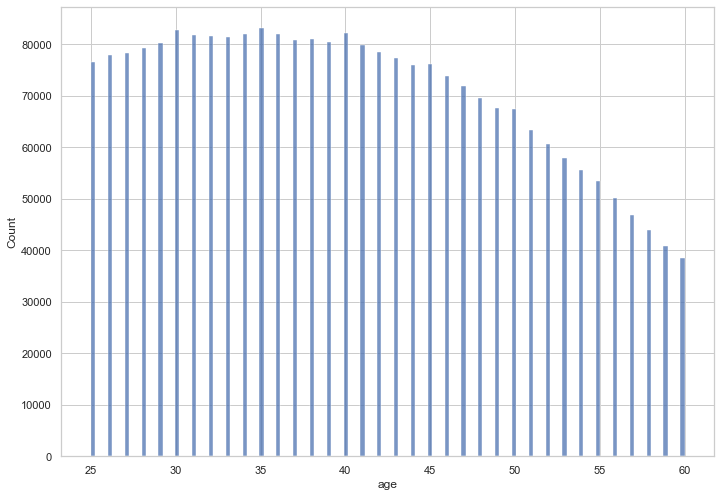

In [9]:
# We can look at a histogram distribution of ages 
# x-axis = age
# y-axis = number of people with that age
sns.histplot(data=df, x="age")

In [10]:
# We can also do random calculations
df['age'] + 10

0         68.00
1         52.00
2         68.00
3         38.00
4         35.00
           ... 
2539664   45.00
2539665     NaN
2539666     NaN
2539667     NaN
2539668     NaN
Name: age, Length: 2539669, dtype: float64

In [13]:
# This is how we create new variables
df['age_plus_ten'] = df['age'] + 10

# * = multiply
# ** = to the power
# / is divide
# + is add

# scroll to the right to see our new variable
df.head() 

,year,age,sex,race,annual_hours,occ1990dd,occtitle,occbin,educbin,salary,age_plus_10,age_plus_ten
0,1976.00,58.00,2.00,100.00,2080.00,276,Cashiers,Sales/Admin.,Less than HS,20286.76,68.00,68.00
1,1976.00,42.00,2.00,100.00,2080.00,337,Bookkeepers and accounting and auditing clerks,Sales/Admin.,Less than HS,36299.29,52.00,52.00
2,1976.00,58.00,1.00,100.00,2340.00,799,"Production checkers, graders, and sorters in m...",Operators,Less than HS,75656.79,68.00,68.00
3,1976.00,28.00,2.00,200.00,2080.00,379,General office clerks,Sales/Admin.,Some college,21098.96,38.00,38.00
4,1976.00,25.00,1.00,100.00,1560.00,804,Driver/sales workers and truck Drivers,Operators,Some college,31761.88,35.00,35.00


## Exercise 1

The goal today is to examine various trends in income inequality in the United States. We're going figure out how wages have changed for different groups since 1976. The first step is to get a clean measure of wages in our data. I have already adjusted salaries for inflation. 

1. Which variable is the income variable in our data? 

2. Compute summary statistics of `salary`. What is the largest salary observed in our data? What is the median? Do the values seem sensible? For reference, the median income in 2018 is around $63,000.

3. What is the problem with using `salary` to compare people's income?

4. Create a new variable `wage` $=\frac{\text{salary}}{\text{annual_hours}}$.

## Exploring a categorical series

- Continuous variables (e.g. age, income) are on a scale (1,2,3,4,5,...) and have a natural order. 

- Categorical variables (e.g. sex, race, occupation) do not have a natural order. They are different groups

In [14]:
# How many in each category?
# In this data, Male=1 and Female=2 
df['sex'].value_counts()

1.00    1366263
2.00    1173402
Name: sex, dtype: int64

In [15]:
# What share of the data is in each category?
df['sex'].value_counts(normalize=True)

# In this data, Male=1 and Female=2 
# What percent is male?

1.00   0.54
2.00   0.46
Name: sex, dtype: float64

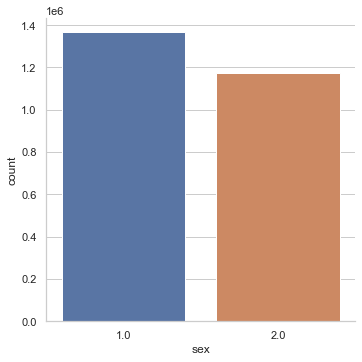

In [16]:
sns.catplot(x='sex', data=df, kind='count')

## Exercise 2

- We are interested in understanding if our sample is representative of the US. 
- One check is to see if we have a racially representative sample. 

- Note: individuals are asked in two separate questions 
    - "What is your race?" 
    - "Are you Spanish, Hispanic, or Latino?"
    
1. Go to [https://cps.ipums.org/cps-action/variables/race#codes_section](https://cps.ipums.org/cps-action/variables/race#codes_section) and look up what the different codes for race mean. Until 2003, the only options were White, Black, and Other.

2. Use `value_counts` to see what percent of our data is White. What percent is Black? What percent is Asian?

3. Add a new variable `White` to our data frame. The variable should take on a value of `1` or `True` if they are White and a value of `0` or `False` if they are not White.
    - If you are not sure what to do: GOOGLE
    
4. Use `sns.catplot()` to visualize the number of people who are White.

## Select rows

Now we know how to explore continuous and categorical variables, we will see how to subset the data in order to understand how the variables change across groups.

In [17]:
# We have 2.5 million observations
# From 1976 all the way to 2019
df['year'].describe()

count   2539665.00
mean       1999.48
std          12.34
min        1976.00
25%        1989.00
50%        2001.00
75%        2010.00
max        2019.00
Name: year, dtype: float64

### Stop and think
Is the average wage higher in 2019 than it was in 1976?

1. Find the rows of our data from the year 1976.
2. Find the rows of our data from 2019.
3. Access the column `wage`.
3. Compute the mean.

In [22]:
# takes on a value of true if year is 2019 and false if not
df['year']==2019 

0          False
1          False
2          False
3          False
4          False
           ...  
2539664     True
2539665    False
2539666    False
2539667    False
2539668    False
Name: year, Length: 2539669, dtype: bool

In [23]:
# make a new dataframe with only observations in 2019
idx = df['year']==2019

df19 = df[idx]
df19.head()

,year,age,sex,race,annual_hours,occ1990dd,occtitle,occbin,educbin,salary,age_plus_10,age_plus_ten,wage
2478278,2019.00,56.00,2.00,100.00,2080.00,25,Other financial specialists,Manage./Professional/Tech.,Adv. Degree,110000.00,66.00,66.00,52.88
2478279,2019.00,38.00,2.00,200.00,2080.00,106,Physicians' assistants,Manage./Professional/Tech.,College grad,90000.00,48.00,48.00,43.27
2478280,2019.00,33.00,2.00,100.00,1300.00,447,Health and nursing aides,Farm/Fish/Forest,Less than HS,25000.00,43.00,43.00,19.23
2478281,2019.00,42.00,2.00,651.00,2080.00,744,Textile sewing machine operators,Operators,Some college,26000.00,52.00,52.00,12.50
2478282,2019.00,37.00,1.00,100.00,2080.00,22,"Managers and administrators, n.e.c.",Manage./Professional/Tech.,Some college,80000.00,47.00,47.00,38.46


In [24]:
# lets check if this worked
# nice all of the years in this dataset at 2019

df19['year'].describe()

count   61387.00
mean     2019.00
std         0.00
min      2019.00
25%      2019.00
50%      2019.00
75%      2019.00
max      2019.00
Name: year, dtype: float64

In [25]:
# What is the mean wage in 2019?
df19['wage'].mean()


29.639850355541597

## Exercise 3

1. Find the mean wage for the year 1976 using the steps above.

## More data cleaning

- I made a mistake when merging in the occupation titles.
- These last few occupations do not represent people. They are missing data.
- `NaN` = not a number. 
    - Similar to `null`, `NA`, `missing`

In [27]:
# the function tail lets us look at the last few observations
df.tail()

,year,age,sex,race,annual_hours,occ1990dd,occtitle,occbin,educbin,salary,age_plus_10,age_plus_ten,wage
2539664,2019.00,35.00,1.00,100.00,2000.00,869,Construction laborers,Operators,HS Grad,44000.00,45.00,45.00,22.00
2539665,NaN,NaN,NaN,NaN,NaN,346,NaN,Sales/Admin.,NaN,NaN,NaN,NaN,NaN
2539666,NaN,NaN,NaN,NaN,NaN,679,NaN,Production,NaN,NaN,NaN,NaN,NaN
2539667,NaN,NaN,NaN,NaN,NaN,475,NaN,Service,NaN,NaN,NaN,NaN,NaN
2539668,NaN,NaN,NaN,NaN,NaN,225,NaN,Sales/Admin.,NaN,NaN,NaN,NaN,NaN


We want to drop observations which are missing.
- We will use the functions `df.isna()`

In [28]:
# The function takes a value of `true` if NA
# `false` if not NA
df.isna().tail()

,year,age,sex,race,annual_hours,occ1990dd,occtitle,occbin,educbin,salary,age_plus_10,age_plus_ten,wage
2539664,False,False,False,False,False,False,False,False,False,False,False,False,False
2539665,True,True,True,True,True,False,True,False,True,True,True,True,True
2539666,True,True,True,True,True,False,True,False,True,True,True,True,True
2539667,True,True,True,True,True,False,True,False,True,True,True,True,True
2539668,True,True,True,True,True,False,True,False,True,True,True,True,True


In [29]:
# Mark the rows we want to drop. If missing the variable year.
missingyear = df['year'].isna()

# drop those rows, ~ means 'not'
df = df[~missingyear]

# nice it worked
df.tail()

,year,age,sex,race,annual_hours,occ1990dd,occtitle,occbin,educbin,salary,age_plus_10,age_plus_ten,wage
2539660,2019.00,25.00,2.00,100.00,1404.00,405,"Housekeepers, maids, butlers, and cleaners",Farm/Fish/Forest,Some college,7000.00,35.00,35.00,4.99
2539661,2019.00,29.00,1.00,651.00,2080.00,436,Cooks,Farm/Fish/Forest,Some college,40000.00,39.00,39.00,19.23
2539662,2019.00,38.00,1.00,100.00,2340.00,505,Automobile mechanics and repairers,Production,Some college,62000.00,48.00,48.00,26.50
2539663,2019.00,57.00,2.00,100.00,3120.00,22,"Managers and administrators, n.e.c.",Manage./Professional/Tech.,College grad,70000.00,67.00,67.00,22.44
2539664,2019.00,35.00,1.00,100.00,2000.00,869,Construction laborers,Operators,HS Grad,44000.00,45.00,45.00,22.00


## Exercise 4

- There are often outliers in the data due to data entry errors
- We will drop wage outliers

1. Drop rows which have a wage < $5 

2. Drop rows which have a wage > $500

## The best way to explore the data is to plot it!

The income distribution is very **right tailed**. 

That means most people are on the left (= make $100 or less per hour).

But that a few people strech all the way to the right. 

<AxesSubplot:xlabel='wage', ylabel='Count'>

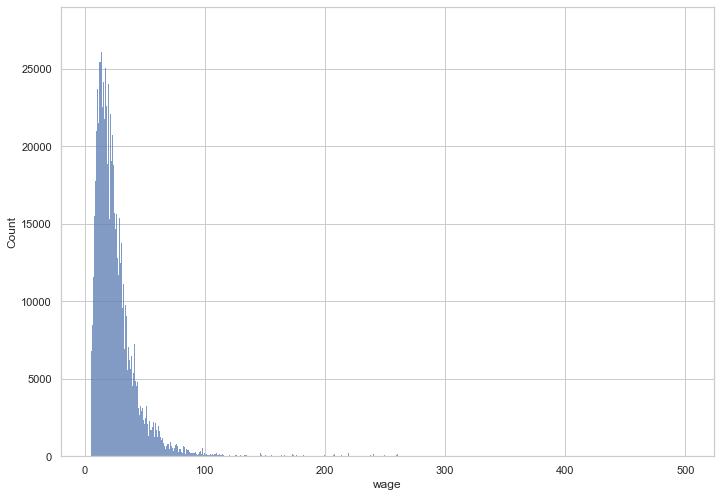

In [31]:
# plot a histogram of wage
sns.histplot(data=df, x="wage")

Lets try it again just with folks who make less than $100 per hour in 2019.

We can see that a majority of workers make less than $20 per hour.

<AxesSubplot:xlabel='wage', ylabel='Count'>

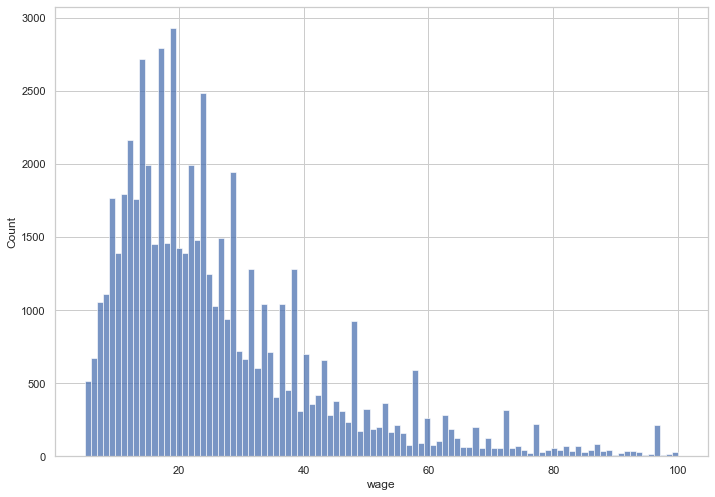

In [32]:
# Restrict just to workers who make less than $100 per hour in 2019
idx_wage = (df['wage'] <= 100) & (df['year']==2019)
dfwage = df[idx_wage]

# plot a histogram of salary
sns.histplot(data=dfwage, x="wage")

## Trends over time

- So far we have mostly pooled our data across years (1976-2019)
- Now we want to see how different variables have changed *over time*

We use the function `groupby()`

In [33]:
df_year = df.groupby('year').mean()
df_year

,age,sex,race,annual_hours,occ1990dd,salary,age_plus_10,age_plus_ten,wage
year,,,,,,,,,
1976.00,40.40,1.39,118.24,1975.38,441.47,49078.93,50.40,50.40,24.36
1977.00,40.07,1.39,121.76,1987.32,438.07,49242.04,50.07,50.07,24.21
1978.00,39.97,1.40,122.11,2000.84,436.29,49777.43,49.97,49.97,24.34
1979.00,39.75,1.41,124.75,2010.22,433.96,48702.99,49.75,49.75,23.72
1980.00,39.52,1.42,125.99,2001.93,428.93,46033.28,49.52,49.52,22.53
1981.00,39.48,1.42,127.31,1981.21,425.42,44891.04,49.48,49.48,22.20
1982.00,39.47,1.43,127.22,1975.13,423.89,45914.47,49.47,49.47,22.74
1983.00,39.33,1.43,127.99,1954.25,385.38,46610.72,49.33,49.33,23.32
1984.00,39.27,1.44,127.07,1973.26,378.52,46625.59,49.27,49.27,23.08


<AxesSubplot:xlabel='year', ylabel='wage'>

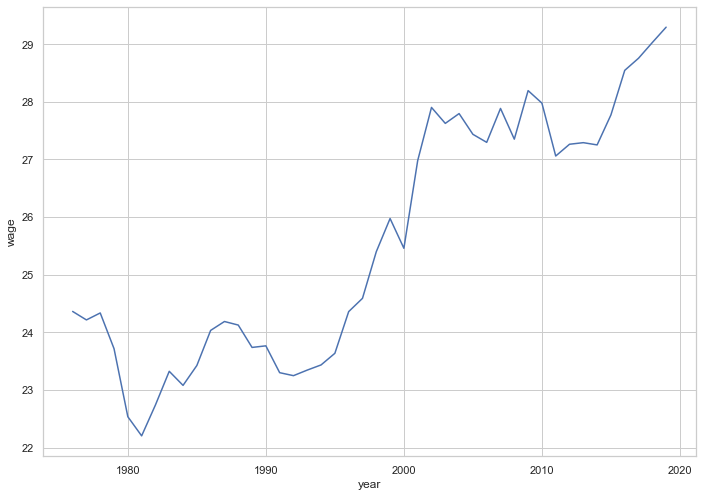

In [34]:
sns.lineplot(data=df_year, x="year", y="wage")

## Stop and think

What do we see has happened here with wages? 

- What was the average wage in 1980? 
- What was the average wage in 2019?
- How has the average wage changed over those 40 years?

## Exercise 5

Lets practice the function `groupby`. Before we computed the average over different variables grouped by year. 

1. Compute the average of different variables grouped by **occbin**.
(Hint: See above)

## Look at male-female wages over time

First lets replace Male=1 and Female=2

In [37]:
# Replace 
df['sex'] = df['sex'].replace(1,"Male")
df['sex'] = df['sex'].replace(2,"Female")

We can group by multiple variables at once.

Try `groupby(['year','sex'])`

In [38]:
df2 = df.groupby(['year','sex']).mean()
df2.head()

age   race  annual_hours  occ1990dd   salary  age_plus_10  \
year    sex                                                                  
1976.00 Female 40.42 121.47       1743.01     380.87 30716.21        50.42   
        Male   40.38 116.19       2123.11     480.01 60753.02        50.38   
1977.00 Female 40.11 125.26       1740.31     374.38 30758.17        50.11   
        Male   40.05 119.51       2146.30     479.07 61138.95        50.05   
1978.00 Female 39.96 124.94       1762.28     372.29 31286.35        49.96   

                age_plus_ten  wage  
year    sex                         
1976.00 Female         50.42 17.39  
        Male           50.38 28.79  
1977.00 Female         50.11 17.37  
        Male           50.05 28.62  
1978.00 Female         49.96 17.42

<AxesSubplot:xlabel='year', ylabel='wage'>

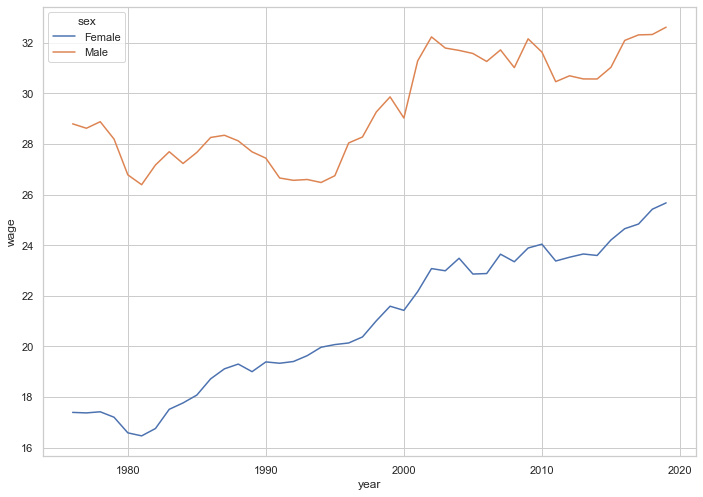

In [39]:
sns.lineplot(data=df2, x="year", y="wage", hue="sex")

## Stop and think

**Trends over time**
- How much has the average Male wage increased?
- How much has the average Female wage increased?

**Wage gap**
- What was the wage gap in 1980?
- What was the wage gap in 2019?

**Broader consequences**

How does this plot explain trends happening to the average wage over time?

## Exercise 6

Now lets look at the White-Non White  wage gap in the US. 

1. Use `replace()` to change the values of the variable `white` to words.

2. Plot the average wage for White and non-White people in the US.

3. How have wages changed for White and Non-White people?

4. How has the White - Non-White wage gap changed since 1980?

# Solutions

### Exercise 1

In [20]:
# 1. Salary is the person's annual salary.
    
# 2. Summary stats 
df['salary'].describe()
# median salary is around $42,000. 
# Sensible it is lower than 2018 because income goes up over time. 
# Our data starts in 1976
# max salary is around $1.9 million


# 3. Problem with salary is that people who work more hours have larger salaries. 
# We want to look at wages per hour.

# 4. Solve this with wage variable.
df['wage'] = df['salary'] / df['annual_hours']
# df['wage'] = df['salary'] / df['annual_hours']
df.head()

,year,age,sex,race,annual_hours,occ1990dd,occtitle,occbin,educbin,salary,age_plus_10,age_plus_ten,wage
0,1976.00,58.00,2.00,100.00,2080.00,276,Cashiers,Sales/Admin.,Less than HS,20286.76,68.00,68.00,9.75
1,1976.00,42.00,2.00,100.00,2080.00,337,Bookkeepers and accounting and auditing clerks,Sales/Admin.,Less than HS,36299.29,52.00,52.00,17.45
2,1976.00,58.00,1.00,100.00,2340.00,799,"Production checkers, graders, and sorters in m...",Operators,Less than HS,75656.79,68.00,68.00,32.33
3,1976.00,28.00,2.00,200.00,2080.00,379,General office clerks,Sales/Admin.,Some college,21098.96,38.00,38.00,10.14
4,1976.00,25.00,1.00,100.00,1560.00,804,Driver/sales workers and truck Drivers,Operators,Some college,31761.88,35.00,35.00,20.36


### Exercise 2

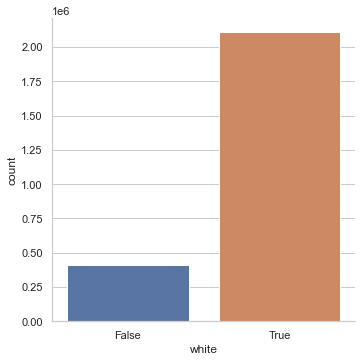

In [43]:
# 1. White = 100, Black=200, Asian=651

# 2. 
# In 2019, the US was about 60% non-Hispanic White 
# In 1980, the US was about 80% non-Hispanic White
df['race'].value_counts(normalize=True)

# 4. 
df['white'] = (df['race'] == 100)
df.head()

# # 3. 
sns.catplot(x='white', data=df, kind='count')


### Exercise 3

In [26]:
idx = df['year']==1976
df76 = df[idx]
df76['wage'].mean()

24.361706430603217

### Exercise 4

In [30]:
df['wage'].describe()


# 1. 
df = df[df['wage'] >= 5]

# 2.
df = df[df['wage'] < 500]

df['wage'].describe()

count   2518721.00
mean         25.91
std          22.08
min           5.00
25%          13.98
50%          20.90
75%          31.22
max         499.31
Name: wage, dtype: float64

### Exercise 5

In [35]:
# Example answer

df_occ = df.groupby('occbin').mean()
df_occ.head()

,year,age,sex,race,annual_hours,occ1990dd,salary,age_plus_10,age_plus_ten,wage
occbin,,,,,,,,,,
Farm/Fish/Forest,2000.91,40.52,1.57,159.14,1877.92,439.29,32074.89,50.52,50.52,16.70
Manage./Professional/Tech.,2001.35,41.36,1.50,146.95,2156.53,78.25,77381.49,51.36,51.36,35.44
Operators,1997.08,40.58,1.26,140.67,2021.17,811.06,40883.10,50.58,50.58,20.08
Production,1996.75,40.54,1.08,129.25,2102.49,577.62,54360.53,50.54,50.54,25.85
Sales/Admin.,1999.06,40.57,1.65,141.10,1984.52,300.30,46448.24,50.57,50.57,22.80


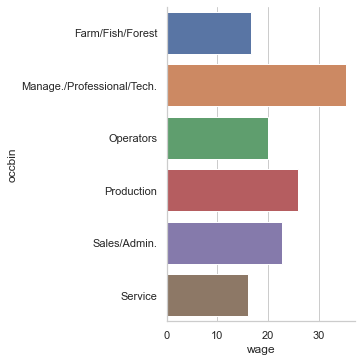

In [36]:
sns.catplot(y=df_occ.index, x="wage", kind="bar", data=df_occ, orient="h")

### Exercise 6

<AxesSubplot:xlabel='year', ylabel='wage'>

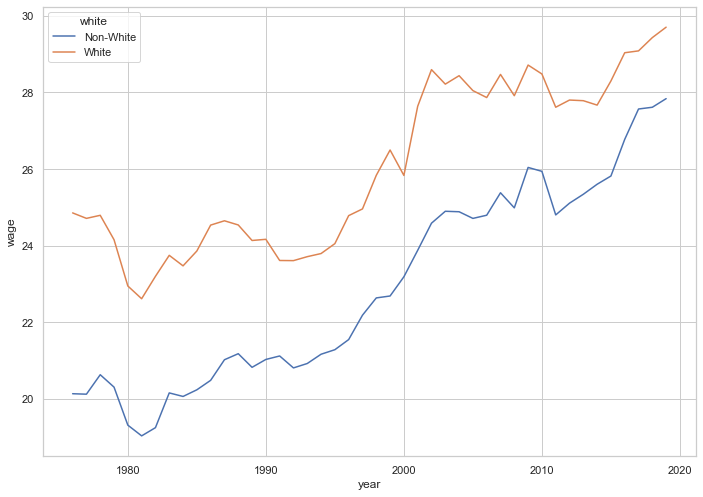

In [44]:
# Replace 
df['white'] = df['white'].replace(True,"White")
df['white'] = df['white'].replace(False,"Non-White")

# Group
df3 = df.groupby(['year','white']).mean()
df3.head()

sns.lineplot(data=df3, x="year", y="wage", hue="white")